# ParSNIP latent dimension size

In this notebook, we compare the results of the ParSNIP model when trained with a range of different latent dimension sizes. For each latent dimension size we trained three separate models on the PS1 dataset. We calculate the loss function for each of these models on both the PS1 training and test datasets and use this to determine how many dimensions are necessary/useful.

# Load the dataset

In [1]:
import numpy as np
from matplotlib import pyplot as plt

import parsnip

In [2]:
%%time
# Load the dataset
dataset = parsnip.load_dataset('../data/ps1.h5')

# Preprocess it
base_model = parsnip.load_model('../models/parsnip_ps1.pt')
dataset = base_model.preprocess(dataset)

# Split into train/test
train_dataset, test_dataset = parsnip.split_train_test(dataset)

Parsing 'ps1.h5' as PanSTARRS dataset ...
Preprocessing dataset: 100%|██████████| 2885/2885 [00:02<00:00, 1094.12it/s]
CPU times: user 4.36 s, sys: 376 ms, total: 4.74 s
Wall time: 3.82 s


# Score the dataset with a series of models trained with different latent sizes.

In [3]:
train_scores = []
test_scores = []
latent_sizes = []

base_rounds = 10

for latent_size in range(1, 11):
    size_train_scores = []
    size_test_scores = []
    print(f'Dimension {latent_size}:')
    for model_idx in range(1, 4):
        model = parsnip.load_model(f'../models/latent_{latent_size}_{model_idx}.pt', device='cuda')

        train_score = model.score(train_dataset, rounds=base_rounds, return_components=True)
        test_score = model.score(test_dataset, rounds=10 * base_rounds, return_components=True)

        print(f'    Model #{model_idx}: train={np.sum(train_score):.2f}, test={np.sum(test_score):.2f}')

        size_train_scores.append(train_score)
        size_test_scores.append(test_score)
    train_scores.append(size_train_scores)
    test_scores.append(size_test_scores)
    print("")

train_scores = np.array(train_scores)
test_scores = np.array(test_scores)
latent_sizes = np.array(latent_sizes)

Dimension 1:
    Model #1: train=63.61, test=77.52
    Model #2: train=62.58, test=80.70
    Model #3: train=63.08, test=79.65

Dimension 2:
    Model #1: train=59.51, test=74.15
    Model #2: train=59.19, test=73.48
    Model #3: train=59.23, test=72.21

Dimension 3:
    Model #1: train=58.20, test=71.60
    Model #2: train=58.46, test=71.78
    Model #3: train=58.27, test=72.92

Dimension 4:
    Model #1: train=59.24, test=71.67
    Model #2: train=58.15, test=71.87
    Model #3: train=58.47, test=72.86

Dimension 5:
    Model #1: train=58.76, test=72.37
    Model #2: train=58.28, test=72.79
    Model #3: train=58.50, test=71.44

Dimension 6:
    Model #1: train=58.29, test=72.49
    Model #2: train=58.97, test=72.00
    Model #3: train=58.72, test=72.65

Dimension 7:
    Model #1: train=58.05, test=71.86
    Model #2: train=59.18, test=72.54
    Model #3: train=58.78, test=72.49

Dimension 8:
    Model #1: train=58.68, test=71.27
    Model #2: train=58.54, test=72.11
    Model #3: t

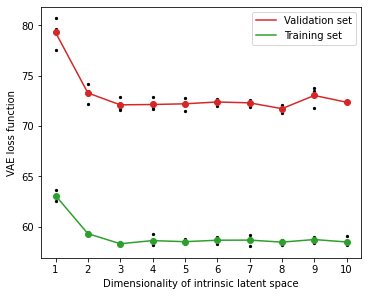

In [4]:
plt.figure(figsize=(5, 4), constrained_layout=True)

train_loss = np.sum(train_scores, axis=2)
test_loss = np.sum(test_scores, axis=2)

plt.scatter(np.tile(np.arange(1, 11), (3, 1)).T, train_loss, s=5, c='k')
plt.scatter(np.tile(np.arange(1, 11), (3, 1)).T, test_loss, s=5, c='k')
plt.scatter(np.arange(1, 11), np.mean(test_loss, axis=1), c='C3')
plt.scatter(np.arange(1, 11), np.mean(train_loss, axis=1), c='C2')
plt.plot(np.arange(1, 11), np.mean(test_loss, axis=1), c='C3', label='Validation set')
plt.plot(np.arange(1, 11), np.mean(train_loss, axis=1), c='C2', label='Training set')
plt.legend()
plt.ylabel('VAE loss function')
plt.xlabel('Dimensionality of intrinsic latent space')
plt.xticks(np.arange(10) + 1)

plt.savefig('./figures/vae_dimensionality.pdf')